# 18MA20015 | Harshal Dupare

There is a dataset of sign language using hand gestures. So there are 10 classes each classes having 3000 images. All the images are in RGB format. You need to perform the following steps.

1. Convert the image into binary image. From each class in the dataset use 70% for training and 30% for testing.
2. Extract features from these and store them in a csv file (features should be chosen by you - eg. binary pixel vectors, total number of white pixels, local binary patterns). Represent each image using such features. [2 marks]
3. Use the features for classification using SVM (default setting). Print classification report. [3 marks]
4. Apply grid search for hyper-parameter tuning.(eg: kernel, C, gamma). [3 marks]
5. Report the model with best accuracy. [2 marks]

In [2]:
import os
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import cv2
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

In [3]:
# required data
CWD = os.getcwd()
DATA_FOLDER = "Lab0609"
ImageTypes = ["A","B","C","D","E","F","G","H","I","nothing"]
ImageCounts = [3000,3000,3000,3000,3000,3000,3000,3000,3000,3000]

In [4]:
# loads image as gray scale image
# takes the mean of (csz,csz) {here (10,10)} 
# size blocks covering image as initial features values 
# now takes median of all the values and uses it
# as the threshold for binary features i.e. 
# if ( >threshold ) then 1 else 0 for the fet[i,j] value
# reshapes it and returns as a dataframe object

def image_to_row_df(path,csz=10):
    img = cv2.imread(path,0)
    fet = np.zeros((img.shape[0]//csz,img.shape[1]//csz))
    for i in range(fet.shape[0]):
        for j in range(fet.shape[1]):
            fet[i,j] = np.mean(img[i*10:(i+1)*10,j*10:(j+1)*10])//1
    fet = 1*( fet > np.median(fet) )
    return pd.DataFrame(fet.reshape([-1,1])).T


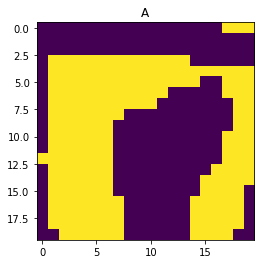

In [5]:
# example output for feature understanding
ipath = os.path.join(CWD,DATA_FOLDER,ImageTypes[0],ImageTypes[0]+str(100)+".jpg")
plt.imshow(np.array(image_to_row_df(ipath)).reshape([20,20]))
plt.title(ImageTypes[0])
plt.show()

In [6]:
# converts loads each image and processes it and adds to the datafarme

df = pd.DataFrame()
problem_paths = []
for ic,it in tqdm(enumerate(ImageTypes)):
    for i in range(1,ImageCounts[ic]+1):
        ipath = os.path.join(CWD,DATA_FOLDER,ImageTypes[ic],ImageTypes[ic]+str(i)+".jpg")
        try:
            tdf = image_to_row_df(ipath)
            tdf["Class"]=ic
            df=df.append(tdf, ignore_index=True)
        except:
            problem_paths.append(ipath)


In [7]:
# check if the length of datafarme is 30000

len(df)

30000

In [8]:
# check if no images are left out

len(problem_paths)

0

In [9]:
# stores as csv 

df.to_csv(os.path.join(CWD,DATA_FOLDER+".csv") ,index = False)

In [10]:
X,y = np.array(df.iloc[:,:-1]),np.array(df.iloc[:,400])

In [11]:
# split data into 70-30%
X_train , X_test , y_train, y_test = train_test_split(X, y, stratify=y,test_size = 0.3)
print(X_test.shape)
print(X_train.shape)
print(y_test.shape)
print(y_train.shape)

(9000, 400)
(21000, 400)
(9000,)
(21000,)


In [12]:
# classifier with default patameters

clf = svm.SVC()

In [13]:
# fit the model

clf.fit(X_train, y_train)

SVC()

In [14]:
y_pred=clf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.92      0.92       900
           1       0.88      0.93      0.90       900
           2       0.94      0.97      0.96       900
           3       0.92      0.94      0.93       900
           4       0.94      0.88      0.91       900
           5       0.98      0.92      0.95       900
           6       0.92      0.95      0.94       900
           7       0.95      0.95      0.95       900
           8       0.95      0.93      0.94       900
           9       1.00      1.00      1.00       900

    accuracy                           0.94      9000
   macro avg       0.94      0.94      0.94      9000
weighted avg       0.94      0.94      0.94      9000



In [15]:
# hyperparameter tuning
params = {'kernel': ['rbf'],
              'C': [0.1, 0.5, 1, 2], 
              'gamma': ['scale',1e-2,1e-1,1]} 

In [26]:
# finding best hyperparameter using grid search

opt_acc = 0
best_model = None
for k in params['kernel']:
    for c in tqdm(params['C']):
        for g in params['gamma']:
            clf = svm.SVC(kernel = k,C=c,gamma=g)
            clf.fit(X_train, y_train)
            y_pred=clf.predict(X_test)
            acc = np.mean(1*(y_pred==y_test))
            print(f"Accuracy with hyperparamters gamma: {g} & C: {c} is {acc*100:.2f}")
            if opt_acc <= acc:
                opt_acc = acc
                best_model = clf

Accuracy with hyperparamters gamma: scale & C: 0.1 is 74.74
Accuracy with hyperparamters gamma: 0.01 & C: 0.1 is 74.72
Accuracy with hyperparamters gamma: 0.1 & C: 0.1 is 69.84
Accuracy with hyperparamters gamma: 1 & C: 0.1 is 13.99
Accuracy with hyperparamters gamma: scale & C: 0.5 is 91.03
Accuracy with hyperparamters gamma: 0.01 & C: 0.5 is 91.02
Accuracy with hyperparamters gamma: 0.1 & C: 0.5 is 96.42
Accuracy with hyperparamters gamma: 1 & C: 0.5 is 24.01
Accuracy with hyperparamters gamma: scale & C: 1 is 93.87
Accuracy with hyperparamters gamma: 0.01 & C: 1 is 93.87
Accuracy with hyperparamters gamma: 0.1 & C: 1 is 98.06
Accuracy with hyperparamters gamma: 1 & C: 1 is 46.86
Accuracy with hyperparamters gamma: scale & C: 2 is 96.04
Accuracy with hyperparamters gamma: 0.01 & C: 2 is 96.04
Accuracy with hyperparamters gamma: 0.1 & C: 2 is 98.26
Accuracy with hyperparamters gamma: 1 & C: 2 is 49.31



In [28]:
# report on best model
y_pred=best_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       900
           1       0.97      0.98      0.98       900
           2       1.00      0.99      0.99       900
           3       0.98      0.98      0.98       900
           4       0.99      0.96      0.97       900
           5       0.96      0.99      0.98       900
           6       0.98      0.98      0.98       900
           7       0.99      0.98      0.99       900
           8       0.99      0.97      0.98       900
           9       1.00      1.00      1.00       900

    accuracy                           0.98      9000
   macro avg       0.98      0.98      0.98      9000
weighted avg       0.98      0.98      0.98      9000

